In [1]:
import pandas as pd
pd.set_option('display.max_columns',None) ## 모든 열을 출력한다

In [2]:
h2020 = pd.read_csv('h2020.csv',encoding='cp949')
h2021 = pd.read_csv('h2021.csv',encoding='cp949')
h2022 = pd.read_csv('h2022.csv',encoding='cp949')

C:\Users\byjoo\AppData\Local\Temp\ipykernel_8276\334367372.py:1: DtypeWarning: Columns (71,72,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  h2020 = pd.read_csv('h2020.csv',encoding='cp949')
C:\Users\byjoo\AppData\Local\Temp\ipykernel_8276\334367372.py:2: DtypeWarning: Columns (62,63,71,72,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  h2021 = pd.read_csv('h2021.csv',encoding='cp949')
C:\Users\byjoo\AppData\Local\Temp\ipykernel_8276\334367372.py:3: DtypeWarning: Columns (62,63,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  h2022 = pd.read_csv('h2022.csv',encoding='cp949')


In [3]:
h2020

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,배우자코드,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_10차산업분류코드,가구주_7차직업분류코드,가구주_종사상지위코드,가구원2_가구주관계코드,가구원2_성별코드,가구원2_연령,가구원2_학력코드,가구원2_수학구분코드,가구원2_취업여부,가구원2_10차산업분류코드,가구원2_7차직업분류코드,가구원2_종사상지위코드,가구원3_가구주관계코드,가구원3_성별코드,가구원3_연령,가구원3_학력코드,가구원3_수학구분코드,가구원3_취업여부,가구원3_10차산업분류코드,가구원3_7차직업분류코드,가구원3_종사상지위코드,가구원4_가구주관계코드,가구원4_성별코드,가구원4_연령,가구원4_학력코드,가구원4_수학구분코드,가구원4_취업여부,가구원4_10차산업분류코드,가구원4_7차직업분류코드,가구원4_종사상지위코드,가구원5_가구주관계코드,가구원5_성별코드,가구원5_연령,가구원5_학력코드,가구원5_수학구분코드,가구원5_취업여부,가구원5_10차산업분류코드,가구원5_7차직업분류코드,가구원5_종사상지위코드,가구원6_가구주관계코드,가구원6_성별코드,가구원6_연령,가구원6_학력코드,가구원6_수학구분코드,가구원6_취업여부,가구원6_10차산업분류코드,가구원6_7차직업분류코드,가구원6_종사상지위코드,가구원7_가구주관계코드,가구원7_성별코드,가구원7_연령,가구원7_학력코드,가구원7_수학구분코드,가구원7_취업여부,가구원7_10차산업분류코드,가구원7_7차직업분류코드,가구원7_종사상지위코드,가구원8_가구주관계코드,가구원8_성별코드,가구원8_연령,가구원8_학력코드,가구원8_수학구분코드,가구원8_취업여부,가구원8_10차산업분류코드,가구원8_7차직업분류코드,가구원8_종사상지위코드,가구원9_가구주관계코드,가구원9_성별코드,가구원9_연령,가구원9_학력코드,가구원9_수학구분코드,가구원9_취업여부,가구원9_10차산업분류코드,가구원9_7차직업분류코드,가구원9_종사상지위코드,비동거취업배우자유무,비동거학업배우자유무,비동거기타배우자유무,비동거취업미혼자녀수,비동거학업미혼자녀수,비동거기타미혼자녀수,거처구분코드,자동차보유대수,입주형태코드,월세평가금액,전세보증금,월세사글세,주거용전용면적,주택소유유무,가중값,전국전체가구_1인이상소득5분위코드,전국근로자가구_1인이상소득5분위코드,전국근로자외가구_1인이상소득5분위코드,도시전체가구_1인이상소득5분위코드,도시근로자가구_1인이상소득5분위코드,도시근로자외가구_1인이상소득5분위코드,전국전체가구_1인이상소득10분위코드,전국근로자가구_1인이상소득10분위코드,전국근로자외가구_1인이상소득10분위코드,도시전체가구_1인이상소득10분위코드,도시근로자가구_1인이상소득10분위코드,도시근로자외가구_1인이상소득10분위코드,소득구간코드,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_식료품비주류음료_곡물구입비,가계지출_소비지출_식료품비주류음료_곡물가공품구입비,가계지출_소비지출_식료품비주류음료_빵떡류구입비,가계지출_소비지출_식료품비주류음료_육류구입비,가계지출_소비지출_식료품비주류음료_육류가공품구입비,가계지출_소비지출_식료품비주류음료_신선수산동물구입비,가계지출_소비지출_식료품비주류음료_염건수산동물구입비,가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비,가계지출_소비지출_식료품비주류음료_유제품및알구입비,가계지출_소비지출_식료품비주류음료_유지류구입비,가계지출_소비지출_식료품비주류음료_과일가공품구입비,가계지출_소비지출_식료품비주류음료_채소가공품구입비,가계지출_소비지출_식료품비주류음료_해조가공품구입비,가계지출_소비지출_식료품비주류음료_당류과자류구입비,가계지출_소비지출_식료품비주류음료_조미식품구입비,가계지출_소비지출_식료품비주류음료_기타식품구입비,가계지출_소비지출_식료품비주류음료_커피차구입비,가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비,가계지출_소비지출_주류담배구입비,가계지출_소비지출_주류담배_주류구입비,가계지출_소비지출_주류담배_담배구입비,가계지출_소비지출_의류신발구입비,가계지출_소비지출_의류신발_직물및외의구입비,가계지출_소비지출_의류신발_내의구입비,가계지출_소비지출_의류신발_기타의복구입비,가계지출_소비지출_의류신발_의복관련서비스구입비,가계지출_소비지출_의류신발_신발구입비,가계지출_소비지출_의류신발_신발서비스구입비,가계지출_소비지출_주거수도광열비,가계지출_소비지출_주거수도광열_실제주거비구입비,가계지출_소비지출_주거수도광열_주택유지수선구입비,가계지출_소비지출_주거수도광열_상하수도폐기물처리비,가계지출_소비지출_주거수도광열_기타주거관련서비스구입비,가계지출_소비지출_주거수도광열_연료비구입비,가계지출_소비지출_가정용품가사서비스이용금액,가계지출_소비지출_가정용품가사서비스_가구조명구입비,가계지출_소비지출_가정용품가사서비스_실내장식구입비,가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액,가계지출_소비지출_가정용품가사서비스_가정용섬유구입비,가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비,가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액,가계지출_소비지출_가정용품가사서비스_가사용품구입비,가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비,가계지출_소비지출_가정용품가사서비스_가사소모품구입비,가계지출_소비지출_가정용품가사서비스_가사서비스금액,가계지출_소비지출_보건제품구입비,가계지출_소비지출_보건_의약품구입비,가계지출_소비지출_보건_의료용소모품구입비,가계지출_소비지출_보건_보건의료용품기구구입비,가계지출_소비지출_보건_외래의료서비스이용금액,가계지출_소비지출_보건_치과서비스이용금액,가계지출_소비지출_보건_기타의료서비스이용금액,가계지출_소비지출_보건_입원서비스이용금액,가계지출_소비지출_교통비,가계지출_소비지출_교통_자동차구입비,가계지출_소비지출_교통_기타운송기구구입비,가계지출_소비지출_교통_운송기구유지수리비,가계지출_소비지출_교통_운송기구연료비,가계지출_소비지출_교통_기타개인교통서비스이용금액,가계지출_소비지출_교통_철도운송금액,가계지출_소비지출_교통_육상운송금액,가계지출_소비지출_교통_기타운송금액,가계지출_소비지출_교통_기타교통관련서비스이용금액,가계지출_소비지출_통신비,가계지출_소비지출_통신_우편서비스이용금액,가계지출_소비지출_통신_통신장비구입비,가계지출_소비지출_통신_통신서비스이용금액,가계지출_소비지출_오락문화비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,가계지출_소비지출_오락문화_악기기구구입비,가계지출_소비지출_오락문화_오락문화내구재유지수리비,가계지출_소비지출_오락문화_장난감취미용품구입비,가계지출_소비지출_오락문화_캠핑운동관련용품구입비,가계지출_소비지출_오락문화_화훼관련용품구입비,가계지출_소비지출_오락문화_애완동물관련물품구입비,가계지출_소비지출_오락문화_화훼애완동물서비스이용금액,가계지출_소비지출_오락문화_운동오락서비스이용금액,가계지출_소비지출_오락문화_문화서비스이용금액,가계지출_소비지출_오락문화_복권구입비,가계지출_소비지출_오락문화_서적구입비,가계지출_소비지출_오락문화_기타인쇄물구입비,가계지출_소비지출_오락문화_문구구입비,가계지출_소비지출_오락문화_단체여행경비,가계지출_소비지출_교육비,가계지출_소비지출_교육_정규교육비,가계지출_소비지출_교육_초등교육비,가계지출_소비지출_교육_중등교육비,가계지출_소비지출_교육_고등교육비,가계지출_소비지출_교육_학원보습교육비,가계지출_소비지출_교육_학생학원교육비,가계지출_소비지출_교육_성인학원비,가계지출_소비지출_교육_기타교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_기타상품서비스이용금액,가계지출_소비지출_기타상품서비스_이미용서비스이용금액,가계지출_소비지출_기타상품서비스_이미용기기구입비,가계지출_소비지출_기타상품서비스_위생이미용용품구입비,가계지출_소비지출_기타상품서비스_시계장신구구입비,가계지출_소비지출_기타상품서비스_기타개인용품구입비,가계지출_소비지출_기타상품

In [4]:
h2020 = h2020.loc[(h2020['가구원수']==1)&(h2020['가구주_연령']>=20)&(h2020['가구주_연령']<30)]
# 20대 연령 1인 가구만 추출

In [5]:
h2021 = h2021.loc[(h2021['가구원수']==1)&(h2021['가구주_연령']>=20)&(h2021['가구주_연령']<30)]
# 20대 연령 1인 가구만 추출
h2022 = h2022.loc[(h2022['가구원수']==1)&(h2022['가구주_연령']>=20)&(h2022['가구주_연령']<30)]
# 20대 연령 1인 가구만 추출

In [6]:
house = pd.concat([h2020,h2021,h2022])

In [7]:
import numpy as np
def outliers_iqr(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    return np.where((data>upper_bound)|(data<lower_bound))

In [8]:
hh20_info=house[['가구주_취업여부','가구주_성별코드','가구주_연령','가중값','가구주_학력코드','가구주_수학구분코드','가계지출_소비지출금액']]

In [9]:
hh20_exp = house.iloc[:,[221,122,144,151,157,176,186,141,190,222,211,191,192,193,194,195,196,168,223]]

In [10]:
hh = pd.concat([hh20_info,hh20_exp],axis=1)

In [11]:
hh

,가구주_취업여부,가구주_성별코드,가구주_연령,가중값,가구주_학력코드,가구주_수학구분코드,가계지출_소비지출금액,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_의류신발구입비,가계지출_소비지출_주거수도광열비,가계지출_소비지출_가정용품가사서비스이용금액,가계지출_소비지출_교통비,가계지출_소비지출_통신비,가계지출_소비지출_주류담배구입비,가계지출_소비지출_오락문화비,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_교육비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,가계지출_소비지출_보건제품구입비,가계지출_소비지출_기타상품서비스이용금액
21,1,1,27,4077.6427,6,1,1399222,465229,116795,90148,132792,24685,89142,95787,92900,250791,4167,0,3658,0,80097,0,0,0,5183,31604
35,1,2,24,2891.8853,5,1,958911,209492,117150,235100,40105,5000,92038,42297,0,51927,0,0,0,0,0,0,0,0,68975,96828
36,1,1,29,2188.4222,6,1,1468274,326953,227868,52893,29623,356721,74761,62068,0,179517,0,0,78333,0,0,2243,0,0,133680,24191
41,2,2,28,4238.2221,5,1,1127203,220350,167615,128200,165533,29525,34425,16327,0,35805,16650,12667,5833,0,0,0,0,0,183882,116225
49,2,2,25,2141.1468,6,1,495179,70217,140959,33572,68483,31080,16467,47633,0,46303,0,0,0,0,0,0,0,0,9772,30693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,1,2,29,405.2075,6,1,2404487,421960,76307,59833,756243,2597,109850,467700,13933,136920,18333,0,0,0,0,0,0,0,27140,313671
12490,2,1,29,443.8536,6,1,1819355,387433,327665,11600,708317,27520,100900,87840,8103,65093,0,0,0,0,8460,0,0,0,51183,43700
12492,1,2,28,1111.5578,4,1,1812551,448208,83012,92650,740868,5388,22847,79158,0,190410,0,0,0,0,0,0,0,0,64117,85893
12497,1,1,27,375.7107,4,1,943867,500900,32945,13500,47640,56980,145750,40308,6750,60944,0,0,0,0,0,0,0,0,4250,33900


In [12]:
hh['음식']=hh['가계지출_소비지출_음식숙박_식대']+hh['가계지출_소비지출_식료품비주류음료구입비']

In [13]:
hh['생활필수']=hh['가계지출_소비지출_주거수도광열비']+hh['가계지출_소비지출_교통비']+hh['가계지출_소비지출_통신비']+hh['가계지출_소비지출_가정용품가사서비스이용금액']

In [14]:
hh['IT']=hh['가계지출_소비지출_오락문화_영상음향기기구입비']+hh['가계지출_소비지출_오락문화_사진광학장비구입비']+hh['가계지출_소비지출_오락문화_정보처리장치구입비']+hh['가계지출_소비지출_오락문화_기록매체구입비']+hh['가계지출_소비지출_오락문화_영상음향정보기기수리비']+hh['가계지출_소비지출_오락문화_내구재구입비']

In [15]:
hh

,가구주_취업여부,가구주_성별코드,가구주_연령,가중값,가구주_학력코드,가구주_수학구분코드,가계지출_소비지출금액,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_의류신발구입비,가계지출_소비지출_주거수도광열비,가계지출_소비지출_가정용품가사서비스이용금액,가계지출_소비지출_교통비,가계지출_소비지출_통신비,가계지출_소비지출_주류담배구입비,가계지출_소비지출_오락문화비,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_교육비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,가계지출_소비지출_보건제품구입비,가계지출_소비지출_기타상품서비스이용금액,음식,생활필수,IT
21,1,1,27,4077.6427,6,1,1399222,465229,116795,90148,132792,24685,89142,95787,92900,250791,4167,0,3658,0,80097,0,0,0,5183,31604,582024,342406,83755
35,1,2,24,2891.8853,5,1,958911,209492,117150,235100,40105,5000,92038,42297,0,51927,0,0,0,0,0,0,0,0,68975,96828,326642,179440,0
36,1,1,29,2188.4222,6,1,1468274,326953,227868,52893,29623,356721,74761,62068,0,179517,0,0,78333,0,0,2243,0,0,133680,24191,554821,523173,80576
41,2,2,28,4238.2221,5,1,1127203,220350,167615,128200,165533,29525,34425,16327,0,35805,16650,12667,5833,0,0,0,0,0,183882,116225,387965,245810,5833
49,2,2,25,2141.1468,6,1,495179,70217,140959,33572,68483,31080,16467,47633,0,46303,0,0,0,0,0,0,0,0,9772,30693,211176,163663,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,1,2,29,405.2075,6,1,2404487,421960,76307,59833,756243,2597,109850,467700,13933,136920,18333,0,0,0,0,0,0,0,27140,313671,498267,1336390,0
12490,2,1,29,443.8536,6,1,1819355,387433,327665,11600,708317,27520,100900,87840,8103,65093,0,0,0,0,8460,0,0,0,51183,43700,715098,924577,8460
12492,1,2,28,1111.5578,4,1,1812551,448208,83012,92650,740868,5388,22847,79158,0,190410,0,0,0,0,0,0,0,0,64117,85893,531220,848261,0
12497,1,1,27,375.7107,4,1,943867,500900,32945,13500,47640,56980,145750,40308,6750,60944,0,0,0,0,0,0,0,0,4250,33900,533845,290678,0


In [16]:
hh['여가']=hh['가계지출_소비지출_음식숙박_숙박비']-hh['IT']+hh['가계지출_소비지출_오락문화비']+hh['가계지출_소비지출_주류담배구입비']

In [17]:
hh['IT 및 교육'] = hh['가계지출_소비지출_교육비']+hh['IT']

In [18]:
hh['건강 및 미용'] = hh['가계지출_소비지출_보건제품구입비']+hh['가계지출_소비지출_기타상품서비스이용금액']

In [19]:
hh.rename(columns={'가계지출금액':"지출총금액", '가계지출_소비지출_식료품비주류음료구입비':"식료품비주류음료구입비", '가계지출_소비지출_주류담배구입비':"주류담배구입비",
       '가계지출_소비지출_의류신발구입비':"의류신발", '가계지출_소비지출_주거수도광열비':"주거수도광열비", '가계지출_소비지출_가정용품가사서비스이용금액':"가정용품가사서비스이용금액",
       '가계지출_소비지출_보건제품구입비':'보건제품구입비', '가계지출_소비지출_교통비':"교통비", '가계지출_소비지출_통신비':"통신비",
       '가계지출_소비지출_오락문화비':"오락문화비", '가계지출_소비지출_교육비':"교육비", '가계지출_소비지출_음식숙박비':"음식숙박비",
       '가계지출_소비지출_기타상품서비스_시계장신구구입비':"시계장신구구입비", '가계지출_소비지출_기타상품서비스_보험료':"보험료",'가구주_학력코드':'학력','가구주_수학구분코드':'수학구분','가계지출_소비지출금액':'총소비지출액','가구주_취업여부':'취업여부'}, inplace=True)

In [20]:
hh.rename(columns={'가구주_성별코드':'성별코드','가구주_연령':'연령'})

,취업여부,성별코드,연령,가중값,학력,수학구분,총소비지출액,가계지출_소비지출_음식숙박_식대,식료품비주류음료구입비,의류신발,주거수도광열비,가정용품가사서비스이용금액,교통비,통신비,주류담배구입비,오락문화비,가계지출_소비지출_음식숙박_숙박비,교육비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,보건제품구입비,가계지출_소비지출_기타상품서비스이용금액,음식,생활필수,IT,여가,IT 및 교육,건강 및 미용
21,1,1,27,4077.6427,6,1,1399222,465229,116795,90148,132792,24685,89142,95787,92900,250791,4167,0,3658,0,80097,0,0,0,5183,31604,582024,342406,83755,264103,83755,36787
35,1,2,24,2891.8853,5,1,958911,209492,117150,235100,40105,5000,92038,42297,0,51927,0,0,0,0,0,0,0,0,68975,96828,326642,179440,0,51927,0,165803
36,1,1,29,2188.4222,6,1,1468274,326953,227868,52893,29623,356721,74761,62068,0,179517,0,0,78333,0,0,2243,0,0,133680,24191,554821,523173,80576,98941,80576,157871
41,2,2,28,4238.2221,5,1,1127203,220350,167615,128200,165533,29525,34425,16327,0,35805,16650,12667,5833,0,0,0,0,0,183882,116225,387965,245810,5833,46622,18500,300107
49,2,2,25,2141.1468,6,1,495179,70217,140959,33572,68483,31080,16467,47633,0,46303,0,0,0,0,0,0,0,0,9772,30693,211176,163663,0,46303,0,40465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,1,2,29,405.2075,6,1,2404487,421960,76307,59833,756243,2597,109850,467700,13933,136920,18333,0,0,0,0,0,0,0,27140,313671,498267,1336390,0,169186,0,340811
12490,2,1,29,443.8536,6,1,1819355,387433,327665,11600,708317,27520,100900,87840,8103,65093,0,0,0,0,8460,0,0,0,51183,43700,715098,924577,8460,64736,8460,94883
12492,1,2,28,1111.5578,4,1,1812551,448208,83012,92650,740868,5388,22847,79158,0,190410,0,0,0,0,0,0,0,0,64117,85893,531220,848261,0,190410,0,150010
12497,1,1,27,375.7107,4,1,943867,500900,32945,13500,47640,56980,145750,40308,6750,60944,0,0,0,0,0,0,0,0,4250,33900,533845,290678,0,67694,0,38150


In [21]:
hh.rename(columns={'가구주_성별코드':"성별", '가구주_연령':"연령", '가계지출_소비지출_식료품비주류음료_커피차구입비':"커피차",
       '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비':"쥬스기타음료", '가계지출_소비지출_음식숙박_식대':"식대", '가계지출_소비지출_음식숙박_숙박비':"숙박비"}, inplace=True)

In [22]:
hh

,취업여부,성별,연령,가중값,학력,수학구분,총소비지출액,식대,식료품비주류음료구입비,의류신발,주거수도광열비,가정용품가사서비스이용금액,교통비,통신비,주류담배구입비,오락문화비,숙박비,교육비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,보건제품구입비,가계지출_소비지출_기타상품서비스이용금액,음식,생활필수,IT,여가,IT 및 교육,건강 및 미용
21,1,1,27,4077.6427,6,1,1399222,465229,116795,90148,132792,24685,89142,95787,92900,250791,4167,0,3658,0,80097,0,0,0,5183,31604,582024,342406,83755,264103,83755,36787
35,1,2,24,2891.8853,5,1,958911,209492,117150,235100,40105,5000,92038,42297,0,51927,0,0,0,0,0,0,0,0,68975,96828,326642,179440,0,51927,0,165803
36,1,1,29,2188.4222,6,1,1468274,326953,227868,52893,29623,356721,74761,62068,0,179517,0,0,78333,0,0,2243,0,0,133680,24191,554821,523173,80576,98941,80576,157871
41,2,2,28,4238.2221,5,1,1127203,220350,167615,128200,165533,29525,34425,16327,0,35805,16650,12667,5833,0,0,0,0,0,183882,116225,387965,245810,5833,46622,18500,300107
49,2,2,25,2141.1468,6,1,495179,70217,140959,33572,68483,31080,16467,47633,0,46303,0,0,0,0,0,0,0,0,9772,30693,211176,163663,0,46303,0,40465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,1,2,29,405.2075,6,1,2404487,421960,76307,59833,756243,2597,109850,467700,13933,136920,18333,0,0,0,0,0,0,0,27140,313671,498267,1336390,0,169186,0,340811
12490,2,1,29,443.8536,6,1,1819355,387433,327665,11600,708317,27520,100900,87840,8103,65093,0,0,0,0,8460,0,0,0,51183,43700,715098,924577,8460,64736,8460,94883
12492,1,2,28,1111.5578,4,1,1812551,448208,83012,92650,740868,5388,22847,79158,0,190410,0,0,0,0,0,0,0,0,64117,85893,531220,848261,0,190410,0,150010
12497,1,1,27,375.7107,4,1,943867,500900,32945,13500,47640,56980,145750,40308,6750,60944,0,0,0,0,0,0,0,0,4250,33900,533845,290678,0,67694,0,38150


In [23]:
hh.drop(['식대','식료품비주류음료구입비','주거수도광열비','가정용품가사서비스이용금액','교통비','통신비','주류담배구입비','오락문화비','숙박비','교육비','가계지출_소비지출_오락문화_영상음향기기구입비','가계지출_소비지출_오락문화_사진광학장비구입비','가계지출_소비지출_오락문화_정보처리장치구입비','가계지출_소비지출_오락문화_기록매체구입비','가계지출_소비지출_오락문화_영상음향정보기기수리비','가계지출_소비지출_오락문화_내구재구입비','가계지출_소비지출_기타상품서비스이용금액'],axis=1,inplace=True)

In [24]:
hh.drop(['IT','보건제품구입비'],axis=1,inplace=True)

In [25]:
hh.drop('가중값',axis=1,inplace=True)

In [26]:
import numpy as np

In [27]:
for i in np.arange(6, 12, 1):
    hh[hh.columns[i]] = hh[hh.columns[i]]/hh["총소비지출액"]

In [28]:
hh=hh.reset_index()

In [29]:
hh

,index,취업여부,성별,연령,학력,수학구분,총소비지출액,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
0,21,1,1,27,6,1,1399222,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291
1,35,1,2,24,5,1,958911,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908
2,36,1,1,29,6,1,1468274,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521
3,41,2,2,28,5,1,1127203,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240
4,49,2,2,25,6,1,495179,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,12486,1,2,29,6,1,2404487,0.024884,0.207224,0.555790,0.070363,0.000000,0.141740
1624,12490,2,1,29,6,1,1819355,0.006376,0.393050,0.508189,0.035582,0.004650,0.052152
1625,12492,1,2,28,4,1,1812551,0.051116,0.293079,0.467993,0.105051,0.000000,0.082762
1626,12497,1,1,27,4,1,943867,0.014303,0.565593,0.307965,0.071720,0.000000,0.040419


In [30]:
hh.drop('index',axis=1,inplace=True)

In [31]:
hh

,취업여부,성별,연령,학력,수학구분,총소비지출액,의류신발,음식,생활필수,여가,IT 및 교육,건강 및 미용
0,1,1,27,6,1,1399222,0.064427,0.415963,0.244712,0.188750,0.059858,0.026291
1,1,2,24,5,1,958911,0.245174,0.340638,0.187129,0.054152,0.000000,0.172908
2,1,1,29,6,1,1468274,0.036024,0.377873,0.356318,0.067386,0.054878,0.107521
3,2,2,28,5,1,1127203,0.113733,0.344184,0.218071,0.041361,0.016412,0.266240
4,2,2,25,6,1,495179,0.067798,0.426464,0.330513,0.093508,0.000000,0.081718
...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1,2,29,6,1,2404487,0.024884,0.207224,0.555790,0.070363,0.000000,0.141740
1624,2,1,29,6,1,1819355,0.006376,0.393050,0.508189,0.035582,0.004650,0.052152
1625,1,2,28,4,1,1812551,0.051116,0.293079,0.467993,0.105051,0.000000,0.082762
1626,1,1,27,4,1,943867,0.014303,0.565593,0.307965,0.071720,0.000000,0.040419


In [32]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x21f740a3790>,
 'caps': [<matplotlib.lines.Line2D at 0x21f740a3cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f740a34f0>],
 'medians': [<matplotlib.lines.Line2D at 0x21f740e8250>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f740e84f0>],
 'means': []}

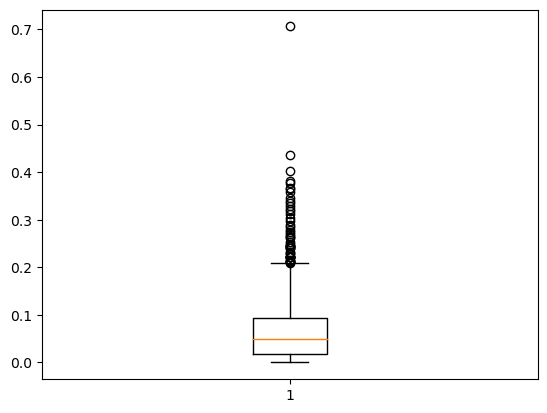

In [33]:
plt.boxplot(hh['의류신발'])

In [34]:
hh.drop(hh[hh['의류신발']>0.7].index,axis=0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f7497f3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21f7497f7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f7497f100>],
 'medians': [<matplotlib.lines.Line2D at 0x21f7497fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f7497ffa0>],
 'means': []}

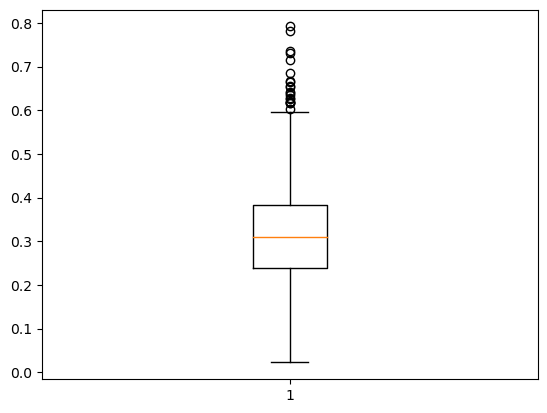

In [35]:
plt.boxplot(hh['음식'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21f74a242b0>,
 'caps': [<matplotlib.lines.Line2D at 0x21f74a24820>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f749effd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21f74a24d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f74a25000>],
 'means': []}

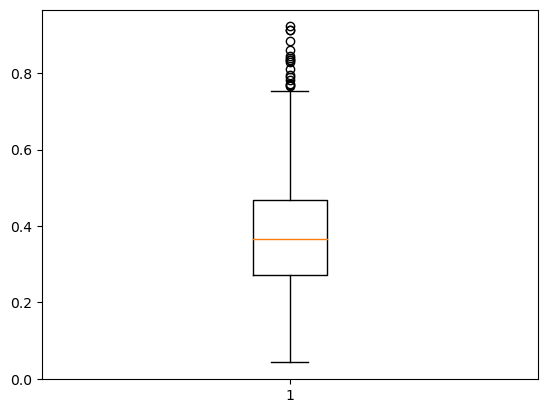

In [36]:
plt.boxplot(hh['생활필수'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21f7419e770>,
 'caps': [<matplotlib.lines.Line2D at 0x21f7419ecb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f7419e5f0>],
 'medians': [<matplotlib.lines.Line2D at 0x21f7419f1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f7419f490>],
 'means': []}

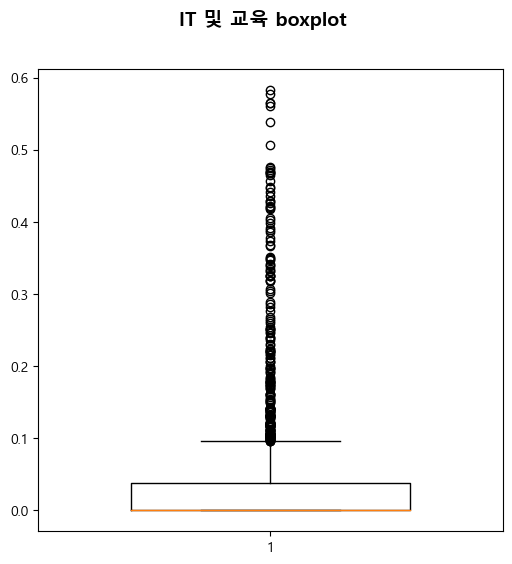

In [37]:
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(6,6))
fig.suptitle('IT 및 교육 boxplot', fontsize=14, fontweight='bold')
plt.boxplot(hh['IT 및 교육'],widths = 0.6)

In [38]:
hh.drop(hh[hh['IT 및 교육']>0.5].index,axis=0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f7420dcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x21f7420e200>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f7420da20>],
 'medians': [<matplotlib.lines.Line2D at 0x21f7420e740>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f7420e9e0>],
 'means': []}

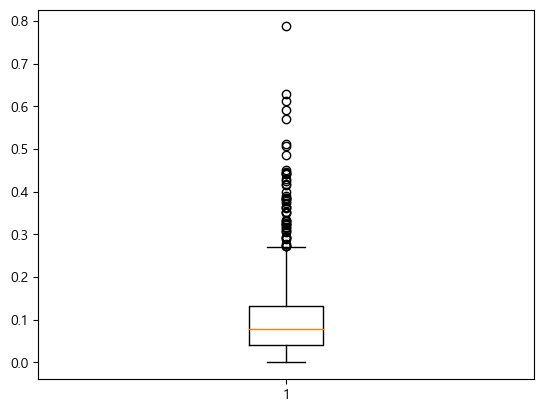

In [39]:
plt.boxplot(hh['여가'])

In [40]:
hh.drop(hh[hh['여가']>0.47].index,axis=0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21f7427e710>,
 'caps': [<matplotlib.lines.Line2D at 0x21f7427eb30>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f7427e470>],
 'medians': [<matplotlib.lines.Line2D at 0x21f7427f070>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f7427f310>],
 'means': []}

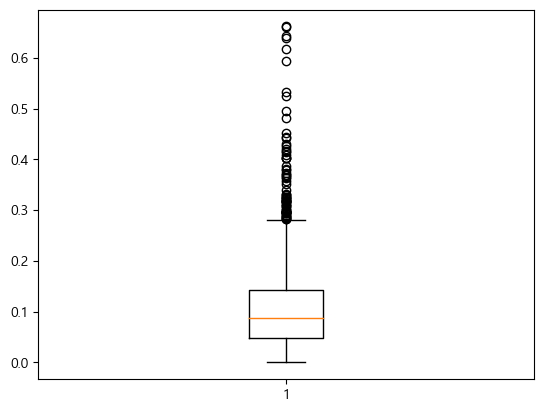

In [41]:
plt.boxplot(hh['건강 및 미용'])

In [42]:
hh.drop(hh[hh['건강 및 미용']>0.57].index,axis=0,inplace=True)

In [43]:
hh.to_csv('house_ratio.csv')